<center>

# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
    
## Práctico # 1. Análisis y visualización de datos
## <span style="color:red">**Fecha de entrega:** 1 de julio de 2024</span>

</center>

--------------

## Análisis y Predicción de Calidad del Aire en una Zona Urbana: Exploración de Datos Multisensor y Modelado Predictivo

<span style="font-family: Arial, sans-serif; font-size: 16px;">
    
La calidad del aire es un tema importante en la agenda mundial de salud ambiental. Según la OMS (2018), los contaminantes atmosféricos son responsables de 1 de cada 9 muertes. Sin embargo, muchas partes del mundo carecen de datos básicos sobre la calidad del aire. 
    
Este conjunto de datos contiene respuestas de un dispositivo multisensor de gases instalado en una zona significativamente contaminada en Italia. El objetivo es examinar cómo los factores ambientales y la concentración de contaminantes interactúan entre sí. Lo que permitirá comprender el nivel de contaminación del área urbana y utilizar la ciencia de datos para informar estrategias de salud ambiental y recomendaciones prácticas para mejorar la calidad del aire y proteger la salud de las personas que viven allí.  

Los datos fueron tomados de https://archive.ics.uci.edu/dataset/360/air+quality 
    
</span>

<span style="font-family: Arial, sans-serif; font-size: 16px;">
    
### Dataset:
    
Consta de 9471 filas y 17 columnas, registrando promedios horarios de respuestas y concentraciones de gases, obtenidas por un analizador certificado mediante sensores químicos de óxido de metal (identificados como PT08.S1, S2, S3, S4 y S5), abarcando un periodo de 1 año a partir del mes de marzo de 2004 y abril de 2005. Los datos faltantes se han codificado como -200.

**Variables a analizar**
    
1. **Fecha** (DD/MM/AAAA)
    
2. **Hora** (HH.MM.SS)
    
3. **CO (GT)**: concentración promedio horaria real de CO en mg/m3 (analizador de referencia)
    
4. **PT08.S1 (óxido de estaño)**: respuesta promedio horaria del sensor (nominalmente objetivo de CO)
    
5. **NMHC (GT)**: concentración total promedio horaria real de hidrocarburos no metánicos en microg/m3 (analizador de referencia)
    
6. **C6H6(GT)**: concentración de benceno promediada por hora real en microg/m3 (analizador de referencia)
    
7. **PT08.S2 (titania)**: respuesta promedio horaria del sensor (nominalmente dirigida a NMHC)
    
8. **NOx(GT)**: concentración de NOx promediada por hora real en ppb (analizador de referencia)
    
9. **PT08.S3 (óxido de tungsteno)**: respuesta promedio horaria del sensor (nominalmente objetivo de NOx)
    
10. **NO2(GT)**: concentración de NO2 promediada por hora real en microg/m3 (analizador de referencia)
    
11. **PT08.S4 (óxido de tungsteno)**: respuesta promedio horaria del sensor (nominalmente objetivo de NO2)
    
12. **PT08.S5 (óxido de indio)**: respuesta promedio horaria del sensor (nominalmente objetivo de O3)
    
13. **T**: Temperatura en °C
    
14. **HR**: Humedad relativa (%)
    
15. **AH**: Humedad Absoluta
    
</span>

<span style="font-family: Arial, sans-serif; font-size: 16px;">
    
### Preguntas a responder en el práctico 1:

1.	¿Cuáles son los valores mínimos y máximos de cada contaminante reportados en el estudio?

2.	¿Cómo varían las concentraciones de los contaminantes durante el día? 

3.	¿Cómo se distribuyen los valores de los contaminantes aplicando gráficos de distribución? ¿existen valores anómalos en los datos que puedan afectar nuestros análisis?

</span>

<span style="font-family: Arial, sans-serif; font-size: 16px;">
    
#### Para inspeccionar y descargar el conjunto de datos, acceder al siguiente repositorio:

https://github.com/PatriMiranda/Calidad-de-Aire/blob/main/AirQualityUCI.csv

</span>

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

In [2]:
# Cargar el dataset

df = pd.read_csv("https://raw.githubusercontent.com/PatriMiranda/Calidad-de-Aire/main/AirQualityUCI.csv", delimiter=',')
df.head(30)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [3]:
# Observar la info que contienen las primeras filas

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
# Observar la info que contienen las ultimas filas

df.tail(50)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Conocer la estructura del dataset

print("Estructura de dataframe", df.shape)
df.info()

Estructura de dataframe (9471, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), o

In [5]:
# Mostrar el nombre de las columnas

df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


---

## Visualizaciones

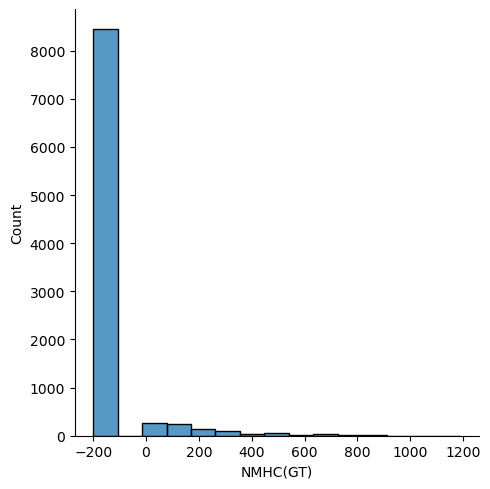

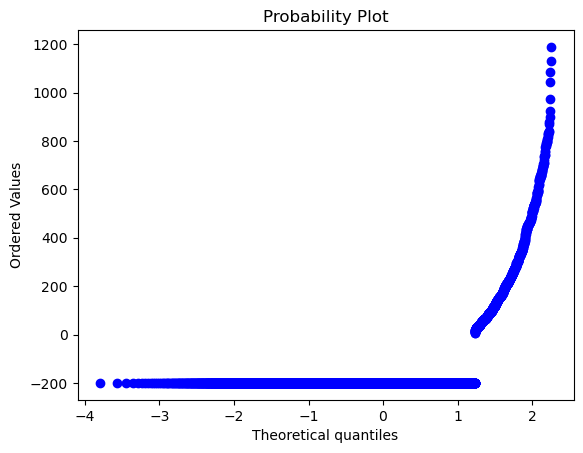

In [33]:
sns.displot(df['NMHC(GT)'])
fig = plt.figure()
res = stats.probplot(df['NMHC(GT)'], plot = plt)
plt.show()

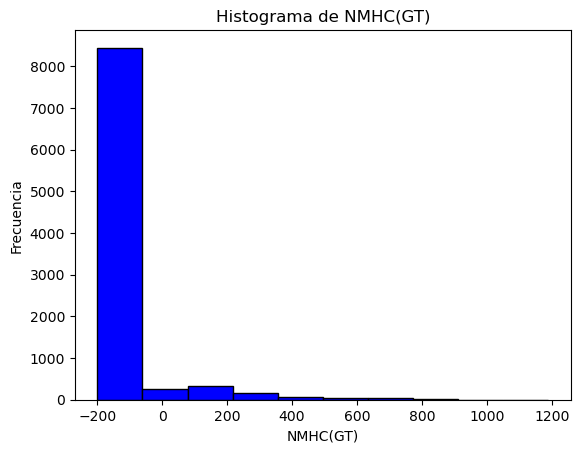

In [26]:
plt.hist(df['NMHC(GT)'], bins=10, color='blue', edgecolor='black')
plt.xlabel('NMHC(GT)')
plt.ylabel('Frecuencia')
plt.title('Histograma de NMHC(GT)')
plt.show()

Text(0.5, 1.0, 'Histograma de NO2(GT)')

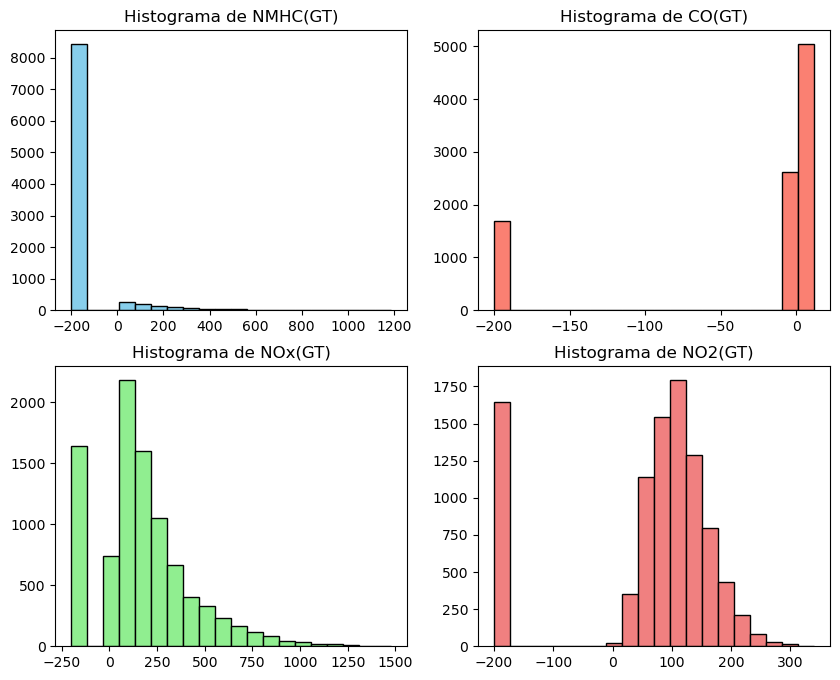

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Graficar los histogramas en los subgráficos correspondientes
axs[0, 0].hist(df['NMHC(GT)'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histograma de NMHC(GT)')
axs[0, 1].hist(df['CO(GT)'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('Histograma de CO(GT)')
axs[1, 0].hist(df['NOx(GT)'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Histograma de NOx(GT)')
axs[1, 1].hist(df['NO2(GT)'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 1].set_title('Histograma de NO2(GT)')

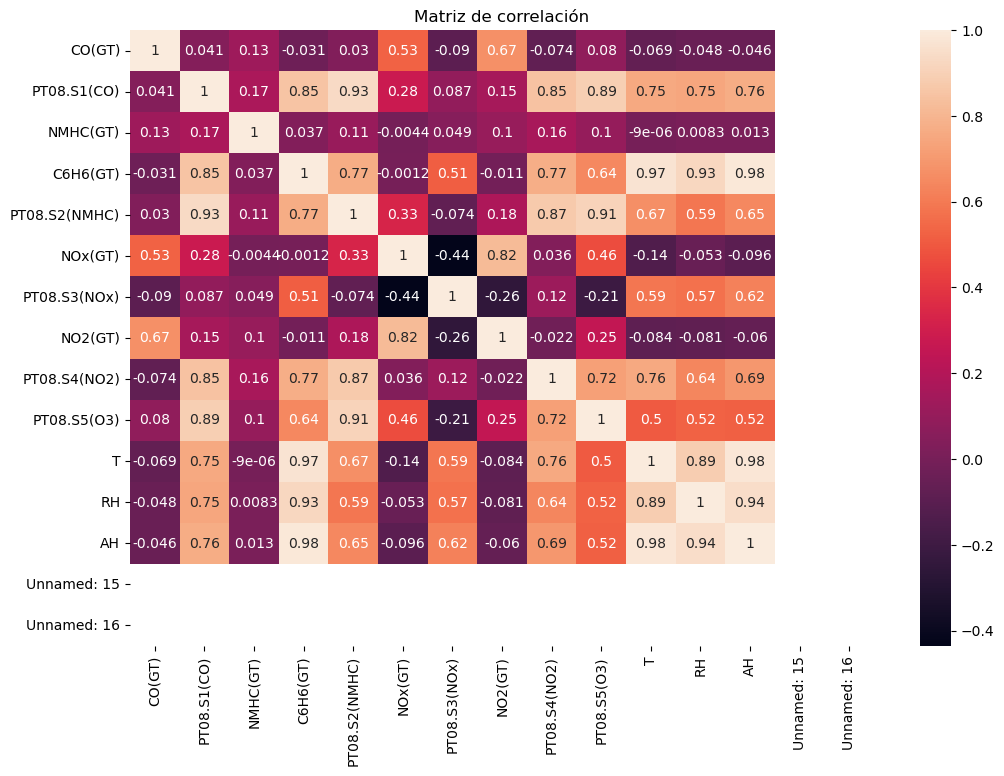

In [31]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de correlación')

plt.show()